# PROJECT MOVIE ANALYSIS
### Presented by: Najmudin Nuwari

## 1. Understanding Data

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [100]:
os.getcwd()

'D:\\Ngoding\\python'

In [101]:
movies = pd.read_csv('movies_metadata.csv', header=0)
movies

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,True,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,True,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,True,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,True,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,True,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45458,True,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45459,True,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45460,True,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45461,True,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [102]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  bool   
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45463 non-null  int64  
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45463 non-null  int64  
 6   imdb_id                45446 non-null  object 
 7   original_language      45452 non-null  object 
 8   original_title         45463 non-null  object 
 9   overview               44509 non-null  object 
 10  popularity             45460 non-null  float64
 11  poster_path            45077 non-null  object 
 12  production_companies   45460 non-null  object 
 13  production_countries   45460 non-null  object 
 14  release_date           45376 non-null  object 
 15  re

## 2. Data Preparation

### Filtering Data

In [103]:
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [104]:
movies['release_date'].dtypes

dtype('<M8[ns]')

In [105]:
movies['status'].unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

In [106]:
movies['original_language'].nunique()

89

### Sorting Data

In [107]:
english_release = movies[(movies['status'] == 'Released') &\
(movies['original_language'] == 'en')]

In [108]:
english_release.sort_values(['budget', 'revenue'], ascending = [False, False]).head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
17124,True,"{'id': 295, 'name': 'Pirates of the Caribbean ...",380000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://disney.go.com/pirates/index-on-stranger...,1865,tt1298650,en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,...,2011-05-14,1.045714e+09,136.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,False,6.4,5068.0
11827,True,"{'id': 295, 'name': 'Pirates of the Caribbean ...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,tt0449088,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",...,2007-05-19,9.610000e+08,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,False,6.9,4627.0
26557,True,"{'id': 86311, 'name': 'The Avengers Collection...",280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,tt2395427,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,...,2015-04-22,1.405404e+09,141.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Age Has Come.,Avengers: Age of Ultron,False,7.3,6908.0
11067,True,"{'id': 8537, 'name': 'Superman Collection', 'p...",270000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.superman.com,1452,tt0348150,en,Superman Returns,Superman returns to discover his 5-year absenc...,...,2006-06-28,3.910812e+08,154.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Superman Returns,False,5.4,1429.0
44839,True,"{'id': 8650, 'name': 'Transformers Collection'...",260000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://www.transformersmovie.com/,335988,tt3371366,en,Transformers: The Last Knight,"Autobots and Decepticons are at war, with huma...",...,2017-06-21,6.049421e+08,149.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"For one world to live, the other must die.",Transformers: The Last Knight,False,6.2,1440.0
16130,True,"{'id': 463959, 'name': 'Tangled Collection', '...",260000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/disneypictures/tangled/,38757,tt0398286,en,Tangled,When the kingdom's most wanted-and most charmi...,...,2010-11-24,5.917949e+08,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They're taking adventure to new lengths.,Tangled,False,7.4,3419.0
18685,True,NaN,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,tt0401729,en,John Carter,"John Carter is a war-weary, former military ca...",...,2012-03-07,2.841391e+08,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,False,6.1,2170.0
11780,True,"{'id': 556, 'name': 'Spider-Man Collection', '...",258000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",http://www.sonypictures.com/movies/spider-man3/,559,tt0413300,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,...,2007-05-01,8.908716e+08,139.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The battle within.,Spider-Man 3,False,5.9,3687.0
21174,True,NaN,255000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://disney.go.com/the-lone-ranger/,57201,tt1210819,en,The Lone Ranger,The Texas Rangers chase down a gang of outlaws...,...,2013-07-03,8.928991e+07,149.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Never Take Off the Mask,The Lone Ranger,False,5.9,2361.0
43252,True,"{'id': 9485, 'name': 'The Fast and the Furious...",250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.fas

### Duplicate Data

In [109]:
english_release.duplicated().sum()

9

In [110]:
english_release[english_release.duplicated(subset = 'original_title', keep=False)].sort_values\
('original_title')

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
15200,True,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,12219,tt0118528,en,12 Angry Men,During the trial of a man accused of his fathe...,...,1997-08-17,0.0,117.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,12 Angry Men,False,7.5,59.0
1161,True,NaN,350000,"[{'id': 18, 'name': 'Drama'}]",NaN,389,tt0050083,en,12 Angry Men,The defense and the prosecution have rested an...,...,1957-03-25,1000000.0,96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Life is in their hands. Death is on their minds.,12 Angry Men,False,8.2,2130.0
20847,True,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,2966,tt0118248,en,"20,000 Leagues Under the Sea","The year is 1886, when New England's fishing h...",...,1997-05-11,0.0,158.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Welcome to the last place on earth.,"20,000 Leagues Under the Sea",False,4.6,13.0
13003,True,NaN,200000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",NaN,30266,tt0006333,en,"20,000 Leagues Under the Sea",Captain Nemo has built a fantastic submarine f...,...,1916-12-24,8000000.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The First Submarine Photoplay Ever Filmed,"20,000 Leagues Under the Sea",False,6.0,7.0
24108,True,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,2965,tt0118247,en,"20,000 Leagues Under the Sea","In the 19th century, an expert marine biologis...",...,1997-03-23,0.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Darkness is to be feared... above and below.,"20,000 Leagues Under the Sea",False,6.3,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11646,True,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,1949,tt0443706,en,Zodiac,The true story of the investigation of 'The Zo...,...,2007-03-02,84785914.0,157.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,There's more than one way to lose your life to...,Zodiac,False,7.3,2080.0
37896,True,NaN,0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,351065,tt3763866,en,Zoom,A multi-dimensional interface between a comic ...,...,2015-09-11,0.0,96.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Zoom,False,5.7,25.0
11171,True,NaN,35000000,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",NaN,14113,tt0383060,en,Zoom,Jack Shepard is an out-of-shape auto shop owne...,...,2006-08-11,12506188.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They're going to save the world... as long as ...,Zoom,False,4.9,140.0
5761,True,"{'id': 374386, 'name': 'Anglo-Zulu War Collect...",3500000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,14433,tt0058777,en,Zulu,"In 1879, during the Zulu wars, man of the peop...",...,1964-01-22,8000000.0,138.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Dwarfing the mightiest! Towering over the grea...,Zulu,False,7.4,137.0


In [111]:
english_release.drop_duplicates(inplace = True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5708\4269851261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_release.drop_duplicates(inplace = True)


### Missing Values

In [112]:
english_release.isna().sum()

adult                        0
belongs_to_collection    28845
budget                       0
genres                       0
homepage                 25842
id                           0
imdb_id                     11
original_language            0
original_title               0
overview                    64
popularity                   0
poster_path                311
production_companies         0
production_countries         0
release_date                59
revenue                      0
runtime                      6
spoken_languages             0
status                       0
tagline                  14114
title                        0
video                        0
vote_average                 0
vote_count                   0
dtype: int64

In [113]:
english_release['belongs_to_collection'] = english_release['belongs_to_collection'].fillna('No data')
english_release['homepage'] = english_release['homepage'].fillna('No data')
english_release['poster_path'] = english_release['poster_path'].fillna('No data')
english_release['tagline'] = english_release['tagline'].fillna('No tagline')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5708\2007502828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_release['belongs_to_collection'] = english_release['belongs_to_collection'].fillna('No data')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5708\2007502828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_release['homepage'] = english_release['homepage'].fillna('No data')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5708\2007502828.py:3: SettingWithCopyWarning: 
A value is trying to b

In [114]:
english_release.dropna(inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5708\2568499517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_release.dropna(inplace=True)


In [115]:
english_release.isna().sum()

adult                    0
belongs_to_collection    0
budget                   0
genres                   0
homepage                 0
id                       0
imdb_id                  0
original_language        0
original_title           0
overview                 0
popularity               0
poster_path              0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
spoken_languages         0
status                   0
tagline                  0
title                    0
video                    0
vote_average             0
vote_count               0
dtype: int64

In [116]:
english_release.shape

(31813, 24)

### Case Study

In [117]:
# 1. Display 10 Movies that have been released and sorted by highest votes
english_release.sort_values("vote_count", ascending = False).head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
15480,True,No data,160000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",http://inceptionmovie.warnerbros.com/,27205,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",...,2010-07-14,8.255328e+08,148.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Your mind is the scene of the crime.,Inception,False,8.1,14075.0
12481,True,"{'id': 263, 'name': 'The Dark Knight Collectio...",185000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",http://thedarkknight.warnerbros.com/dvdsite/,155,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,...,2008-07-16,1.004558e+09,152.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Why So Serious?,The Dark Knight,False,8.3,12269.0
14551,True,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,2009-12-10,2.787965e+09,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0
17818,True,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,24428,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,...,2012-04-25,1.519558e+09,143.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some assembly required.,The Avengers,False,7.4,12000.0
26563,True,"{'id': 448150, 'name': 'Deadpool Collection', ...",58000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.foxmovies.com/movies/deadpool,293660,tt1431045,en,Deadpool,Deadpool tells the origin story of former Spec...,...,2016-02-09,7.831130e+08,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Witness the beginning of a happy ending,Deadpool,False,7.4,11444.0


In [118]:
# 2. Display movies with a duration of more than 3 hours
english_release[english_release["runtime"] > 60 * 3]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
13,True,No data,44000000,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",No data,10858,tt0113987,en,Nixon,An all-star cast powers this epic look at Amer...,...,1995-12-22,13681765.0,192.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Triumphant in Victory, Bitter in Defeat. He Ch...",Nixon,False,7.1,72.0
378,True,No data,63000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",No data,12160,tt0111756,en,Wyatt Earp,Covering the life and times of one of the West...,...,1994-06-24,25052000.0,191.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The epic story of love and adventure in a lawl...,Wyatt Earp,False,6.5,203.0
522,True,No data,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.schindlerslist.com/,424,tt0108052,en,Schindler's List,The true story of how businessman Oskar Schind...,...,1993-11-29,321365567.0,195.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,"Whoever saves one life, saves the world entire.",Schindler's List,False,8.3,4436.0
530,True,No data,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",No data,695,tt0108122,en,Short Cuts,"Multi-storied, fish-eyed look at American cult...",...,1993-09-05,6110979.0,187.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Short Cuts raises the roof on America.,Short Cuts,False,6.9,136.0
583,True,No data,22000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",No data,581,tt0099348,en,Dances with Wolves,"Wounded Civil War soldier, John Dunbar tries t...",...,1990-11-09,424208848.0,181.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Inside everyone is a frontier waiting to be di...,Dances with Wolves,False,7.6,1084.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44755,True,No data,0,[],No data,128733,tt0080230,en,Hollywood,The definitive documentary about the American ...,...,1980-02-09,0.0,780.0,[],Released,No tagline,Hollywood,False,8.0,1.0
44760,True,No data,0,"[{'id': 99, 'name': 'Documentary'}]",No data,461805,tt6840134,en,The Putin Interviews,"Academy Award-winning filmmaker, Oliver Stone ...",...,2017-06-12,0.0,240.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Know Your Enemy,The Putin Interviews,False,8.1,8.0
44924,True,No data,0,"[{'id': 10752, 'name': 'War'}, {'id': 99, 'nam...",https://www.netflix.com/title/80049928,449758,tt6587094,en,Five Came Back,The extraordinary story of how Hollywood chang...,...,2017-03-31,0.0,195.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They Showed The War To The World,Five Came Back,False,8.3,8.0
44959,True,No data,0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",No data,32228,tt0386907,en,5ive Days to Midnight,A physicist discovers a briefcase containing p...,...,2004-01-01,0.0,210.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No tagline,5ive Days to Midnight,False,6.8,18.0


## 3. Feature Engineering

### Aggregate

In [119]:
rating = pd.read_csv("ratings_small.csv")
rating

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [120]:
rating["timestamp"] = pd.to_datetime(rating["timestamp"], unit = "s")

In [121]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100004 non-null  int64         
 1   movieId    100004 non-null  int64         
 2   rating     100004 non-null  float64       
 3   timestamp  100004 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.1 MB


In [122]:
rating.duplicated().sum()

0

In [123]:
rating.groupby("movieId")["rating"].agg(["mean", "count", "median"])

,mean,count,median
movieId,,,
1,3.872470,247,4.0
2,3.401869,107,3.0
3,3.161017,59,3.0
4,2.384615,13,3.0
5,3.267857,56,3.0
...,...,...,...
161944,5.000000,1,5.0
162376,4.500000,1,4.5
162542,5.000000,1,5.0


In [124]:
rating.groupby("movieId").agg({"userId": pd.Series.nunique,
                               "rating": ["mean", "median"]})

userId    rating       
        nunique      mean median
movieId                         
1           247  3.872470    4.0
2           107  3.401869    3.0
3            59  3.161017    3.0
4            13  2.384615    3.0
5            56  3.267857    3.0
...         ...       ...    ...
161944        1  5.000000    5.0
162376        1  4.500000    4.5
162542        1  5.000000    5.0
162672        1  3.000000    3.0
163949        1  5.000000    5.0

[9066 rows x 3 columns]

In [125]:
movies_rating = rating.groupby("movieId")["rating"].agg(["mean", "median", "count"])
movies_rating

,mean,median,count
movieId,,,
1,3.872470,4.0,247
2,3.401869,3.0,107
3,3.161017,3.0,59
4,2.384615,3.0,13
5,3.267857,3.0,56
...,...,...,...
161944,5.000000,5.0,1
162376,4.500000,4.5,1
162542,5.000000,5.0,1


### Join

In [126]:
english_release_rating = english_release.merge(movies_rating,
                      left_on = "id",
                      right_on = "movieId",
                      how = "inner")
english_release_rating

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,mean,median,count
0,True,No data,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",No data,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,3.593750,3.75,16
1,True,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,1.500000,1.50,2
2,True,No data,98000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",No data,1408,tt0112760,en,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Course Has Been Set. There Is No Turning B...,Cutthroat Island,False,5.7,137.0,3.616279,4.00,43
3,True,No data,52000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",No data,524,tt0112641,en,Casino,The life of the gambling paradise – Las Vegas ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No one stays at the top forever.,Casino,False,7.8,1343.0,3.555556,3.50,36
4,True,No data,16500000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",No data,4584,tt0114388,en,Sense and Sensibility,"Rich Mr. Dashwood dies, leaving his second wif...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Lose your heart and come to your senses.,Sense and Sensibility,False,7.2,364.0,5.000000,5.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,True,No data,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",No data,2286,tt0381111,en,Kruistocht in Spijkerbroek,Dolf a 15 year old boy is sent back in time by...,...,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}, {'...",Released,No tagline,Crusade in Jeans,False,6.0,15.0,1.666667,1.00,3
2047,True,No data,0,"[{'id': 18, 'name': 'Drama'}]",No data,3178,tt0211941,en,Beat,The story of writer William Seward Burroughs a...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sex and Drugs before Rock and Roll,Beat,False,4.9,9.0,3.636364,4.00,22
2048,True,"{'id': 2704, 'name': 'The Bible Collection', '...",20000000,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",No data,2331,tt0199232,en,Jesus,The film is notable for presenting a more huma...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No tagline,Jesus,False,5.4,8.0,3.777778,4.00,9
2049,True,No data,0,"[{'id': 18, 'name': 'Drama'}]",No data,80831,tt1576459,en,Sang Pemimpi,This movie is an adaptation from a popular nov...,...,"[{'iso_639_1': 'id', 'name': 'Bahasa indonesia'}]",Released,No tagline,Sang Pemimpi,False,6.5,2.0,3.250000,3.25,4


### Feature Engineering Analysis

In [127]:
# Create a column for Profit = revenue - budget
english_release_rating['profit'] = english_release_rating['revenue'] \
- english_release_rating['budget']

In [128]:
english_release_rating[["original_title", "profit", "runtime"]].sort_values\
("profit", ascending = False).head(10)

,original_title,profit,runtime
310,Titanic,1.645034e+09,194.0
975,The Lord of the Rings: The Return of the King,1.024889e+09,201.0
1308,Pirates of the Caribbean: Dead Man's Chest,8.656598e+08,151.0
82,Jurassic Park,8.571000e+08,127.0
759,Harry Potter and the Philosopher's Stone,8.514756e+08,152.0
851,The Lord of the Rings: The Two Towers,8.472874e+08,179.0
880,Finding Nemo,8.463355e+08,100.0
1499,The Dark Knight,8.195584e+08,152.0
1048,Shrek 2,7.698388e+08,93.0
40,Star Wars,7.643980e+08,121.0


In [129]:
# Create a column for language (English or non-English)
english_release_rating["original_language"] == "en"

0       True
1       True
2       True
3       True
4       True
        ... 
2046    True
2047    True
2048    True
2049    True
2050    True
Name: original_language, Length: 2051, dtype: bool

In [130]:
# Create a column for duration length
english_release_rating['long_duration_movie'] = (english_release_rating['runtime'] >= 60 * 3).astype(int)

In [131]:
english_release_rating[english_release_rating["long_duration_movie"] == 1]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,tagline,title,video,vote_average,vote_count,mean,median,count,profit,long_duration_movie
92,True,No data,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.schindlerslist.com/,424,tt0108052,en,Schindler's List,The true story of how businessman Oskar Schind...,...,"Whoever saves one life, saves the world entire.",Schindler's List,False,8.3,4436.0,3.000000,3.50,3,2.993656e+08,1
94,True,No data,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",No data,695,tt0108122,en,Short Cuts,"Multi-storied, fish-eyed look at American cult...",...,Short Cuts raises the roof on America.,Short Cuts,False,6.9,136.0,4.000000,4.00,2,6.110979e+06,1
102,True,No data,22000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",No data,581,tt0099348,en,Dances with Wolves,"Wounded Civil War soldier, John Dunbar tries t...",...,Inside everyone is a frontier waiting to be di...,Dances with Wolves,False,7.6,1084.0,4.235294,4.00,17,4.022088e+08,1
196,True,No data,15000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",No data,947,tt0056172,en,Lawrence of Arabia,An epic about British officer T.E. Lawrence's ...,...,No tagline,Lawrence of Arabia,False,7.8,870.0,3.681818,4.00,11,5.499538e+07,1
206,True,"{'id': 230, 'name': 'The Godfather Collection'...",13000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",No data,240,tt0071562,en,The Godfather: Part II,In the continuing saga of the Corleone crime f...,...,"I don't feel I have to wipe everybody out, Tom...",The Godfather: Part II,False,8.3,3418.0,3.400000,3.00,5,3.454284e+07,1
238,True,No data,15000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",No data,665,tt0052618,en,Ben-Hur,Ben-Hur is a 1959 epic film directed by Willia...,...,The entertainment experience of a lifetime.,Ben-Hur,False,7.5,660.0,3.400000,3.00,5,1.319000e+08,1
240,True,No data,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",No data,783,tt0083987,en,Gandhi,"In the early years of the 20th century, Mohand...",...,His triumph changed the world forever.,Gandhi,False,7.4,730.0,3.357143,3.50,49,5.573789e+07,1
310,True,No data,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.titanicmovie.com,597,tt0120338,en,Titanic,"84 years later, a 101-year-old woman named Ros...",...,Nothing on Earth could come between them.,Titanic,False,7.5,7770.0,3.360544,3.00,147,1.645034e+09,1
360,True,No data,11000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",No data,907,tt0059113,en,Doctor Zhivago,Doctor Zhivago is the filmed adapation of the ...,...,Turbulent were the times and fiery was the lov...,Doctor Zhivago,False,7.4,252.0,4.090909,4.00,11,1.008584e+08,1
479,True,No data,11000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",No data,3175,tt0072684,en,Barry Lyndon,"In the Eighteenth Century, in a small village ...",...,At long last Redmond Barry became a gentleman ...,Barry Lyndon,False,7.7,521.0,3.507692,3.50,65,9.000000e+06,1


In [132]:
# Create a column for the length of the movie title (title_len)
english_release_rating["title_length"] = english_release_rating["original_title"].str.len()

In [133]:
english_release_rating[english_release_rating["title_length"] < 5]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,title,video,vote_average,vote_count,mean,median,count,profit,long_duration_movie,title_length
0,True,No data,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",No data,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,Heat,False,7.7,1886.0,3.593750,3.75,16,127436818.0,0,4
43,True,No data,31000000,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",No data,1945,tt0110638,en,Nell,"In a remote woodland cabin, a small town docto...",...,Nell,False,6.1,128.0,4.448276,4.50,29,75683817.0,0,4
122,True,No data,45000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",No data,7095,tt0116669,en,Jack,Jack Powell suffers from an affliction that ma...,...,Jack,False,5.9,340.0,2.500000,2.50,1,13620973.0,0,4
126,True,No data,6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",http://www.miramax.com/movie/emma/,3573,tt0116191,en,Emma,Emma Woodhouse is a congenial young lady who d...,...,Emma,False,6.7,152.0,2.250000,2.25,2,16231658.0,0,4
301,True,"{'id': 103372, 'name': 'Mr. Bean Collection', ...",18000000,"[{'id': 35, 'name': 'Comedy'}]",No data,1281,tt0118689,en,Bean,Bean works as a caretaker at Britain's formida...,...,Bean,False,6.3,602.0,4.043478,4.00,23,233212670.0,0,4
333,True,No data,60000,"[{'id': 9648, 'name': 'Mystery'}, {'id': 18, '...",http://www.pithemovie.com/,473,tt0138704,en,Pi,The debut film from Darren Aronofsky in which ...,...,Pi,False,7.1,600.0,1.000000,1.00,3,3161152.0,0,2
355,True,No data,40000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",No data,841,tt0087182,en,Dune,"In the year 10,191, the world is at war for co...",...,Dune,False,6.5,576.0,3.714286,4.00,7,-9074310.0,0,4
363,True,"{'id': 63043, 'name': 'TRON Collection', 'post...",17000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",No data,97,tt0084827,en,Tron,As Kevin Flynn searches for proof that he inve...,...,Tron,False,6.6,717.0,3.875000,4.00,8,16000000.0,0,4
373,True,No data,1500000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",No data,1580,tt0040746,en,Rope,"Two young men strangle their ""inferior"" classm...",...,Rope,False,7.8,539.0,3.663158,4.00,190,700000.0,0,4
382,True,No data,13000000,"[{'id': 10402, 'name': 'Music'}, {'id': 18, 'n...",No data,3682,tt0120577,en,54,"Shane, a Jersey boy with big dreams, crosses t...",...,54,False,5.5,138.0,2.714286,3.00,7,3757163.0,0,2


In [134]:
# Create a column to convert runtime from minutes to hours (0-n) (duration_hours)
english_release_rating["duration_hours"] = english_release_rating["runtime"]/ 60

In [135]:
english_release_rating["duration_hours"]

0       2.833333
1       2.166667
2       1.983333
3       2.966667
4       2.266667
          ...   
2046    2.083333
2047    1.550000
2048    4.000000
2049    2.016667
2050    1.533333
Name: duration_hours, Length: 2051, dtype: float64

In [136]:
english_release_rating["year_release"] = english_release_rating["release_date"].dt.year

In [137]:
english_release_rating["year_release"]

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
2046    2006
2047    2000
2048    1999
2049    2009
2050    1967
Name: year_release, Length: 2051, dtype: int32

In [138]:
# Create a column for favorite movies with a median rating of >=3
english_release_rating["favorite_movies"] = english_release_rating["median"] >=3

In [139]:
english_release_rating["favorite_movies"]

0        True
1       False
2        True
3        True
4        True
        ...  
2046    False
2047     True
2048     True
2049     True
2050     True
Name: favorite_movies, Length: 2051, dtype: bool

In [140]:
year_release = english_release_rating.groupby("year_release").size()

In [141]:
year_release.sort_values(ascending = False). head(10)

year_release
2007    110
2006    105
2005     79
2004     79
2001     75
2003     71
2000     67
2002     63
1998     55
1999     53
dtype: int64

## 4. Exploratory Data Analysis

### 1. What is the distribution of movies with a rating >3?

In [142]:
rating = pd.read_csv("ratings_small.csv")
rating

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [143]:
rating_movies = rating.groupby("movieId", as_index = False)["rating"].median()

In [144]:
rating_movies

,movieId,rating
0,1,4.0
1,2,3.0
2,3,3.0
3,4,3.0
4,5,3.0
...,...,...
9061,161944,5.0
9062,162376,4.5
9063,162542,5.0
9064,162672,3.0


Text(0.5, 1.0, 'Distribution of Movies by Ratings')

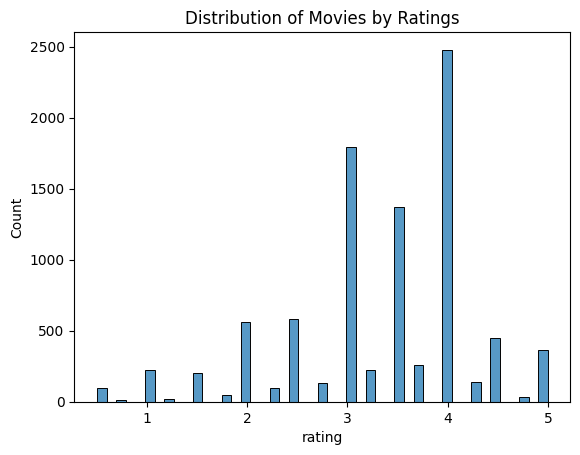

In [153]:
sns.histplot(data = rating_movies,
             x = "rating")
plt.title('Distribution of Movies by Ratings')

In [150]:
rating_movies["good_movies"] = rating_movies["rating"] >= 3

<Axes: ylabel='good_movies'>

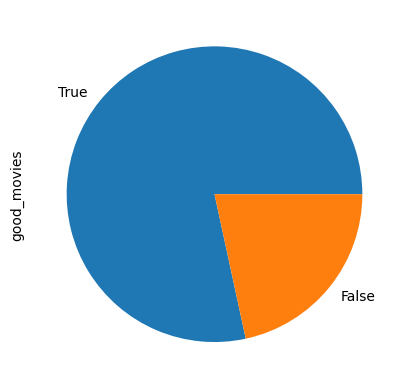

In [151]:
rating_movies["good_movies"].value_counts().plot(kind = "pie",
                                                ylabel='good_movies')

#### Analysis: The number of movies with a rating >= 3 is greater than the number of movies with a rating < 3.

### 2. What is the distribution of the movie durations available?

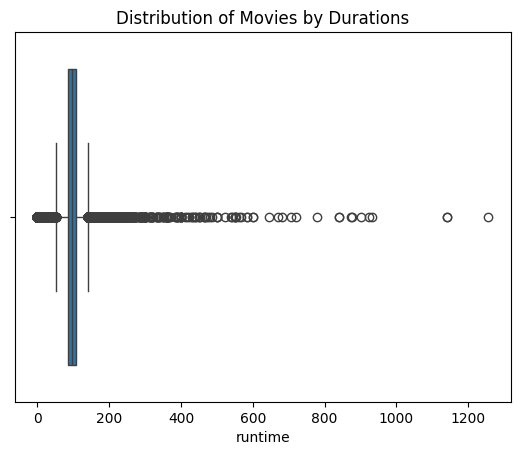

In [154]:
sns.boxplot(data = movies, x = "runtime" )
plt.title('Distribution of Movies by Durations')
plt.show()

#### Analysis: The number of films with a duration in the range of >= 200 and <= 600.

### 3. Is there a relationship between the duration of the movie and the rating it received?

In [155]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45463 non-null  bool          
 1   belongs_to_collection  4491 non-null   object        
 2   budget                 45463 non-null  int64         
 3   genres                 45463 non-null  object        
 4   homepage               7779 non-null   object        
 5   id                     45463 non-null  int64         
 6   imdb_id                45446 non-null  object        
 7   original_language      45452 non-null  object        
 8   original_title         45463 non-null  object        
 9   overview               44509 non-null  object        
 10  popularity             45460 non-null  float64       
 11  poster_path            45077 non-null  object        
 12  production_companies   45460 non-null  object        
 13  p

In [156]:
rating_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9066 entries, 0 to 9065
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movieId      9066 non-null   int64  
 1   rating       9066 non-null   float64
 2   good_movies  9066 non-null   bool   
dtypes: bool(1), float64(1), int64(1)
memory usage: 150.6 KB


In [157]:
duration_rating = movies.merge(rating_movies,
                                    left_on = "id",
                                    right_on = "movieId",
                                    how = "outer")

In [158]:
duration_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51699 entries, 0 to 51698
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45463 non-null  object        
 1   belongs_to_collection  4491 non-null   object        
 2   budget                 45463 non-null  float64       
 3   genres                 45463 non-null  object        
 4   homepage               7779 non-null   object        
 5   id                     45463 non-null  float64       
 6   imdb_id                45446 non-null  object        
 7   original_language      45452 non-null  object        
 8   original_title         45463 non-null  object        
 9   overview               44509 non-null  object        
 10  popularity             45460 non-null  float64       
 11  poster_path            45077 non-null  object        
 12  production_companies   45460 non-null  object        
 13  p

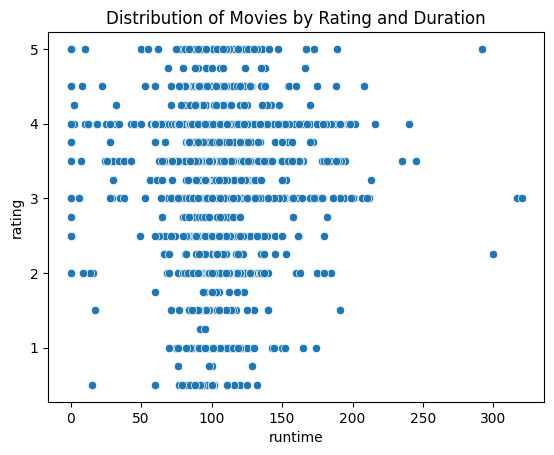

In [160]:
sns.scatterplot(data = duration_rating,
                x = "runtime",
                y = "rating")
plt.title('Distribution of Movies by Rating and Duration')
plt.show()

#### Analysis: Broadly speaking, there is no relationship.

### 4. What is the distribution of profits generated by a movie?

In [161]:
movies["profit"] = movies["revenue"] - movies["budget"]

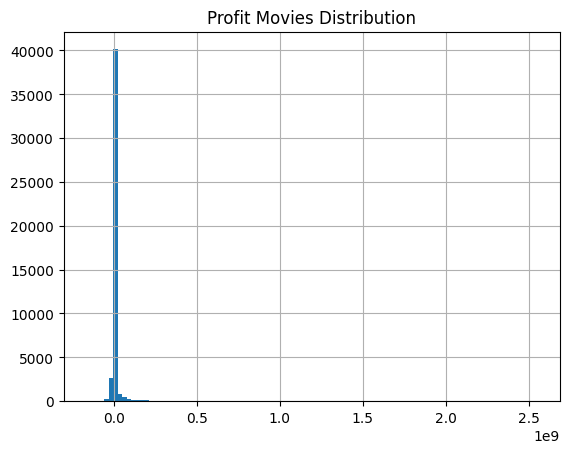

In [162]:
movies["profit"].hist(bins = 100)
plt.title("Profit Movies Distribution")
plt.show()

In [163]:
movies["profit"].describe()

count    4.546000e+04
mean     6.984491e+06
std      5.214125e+07
min     -1.657101e+08
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.550965e+09
Name: profit, dtype: float64

<Axes: >

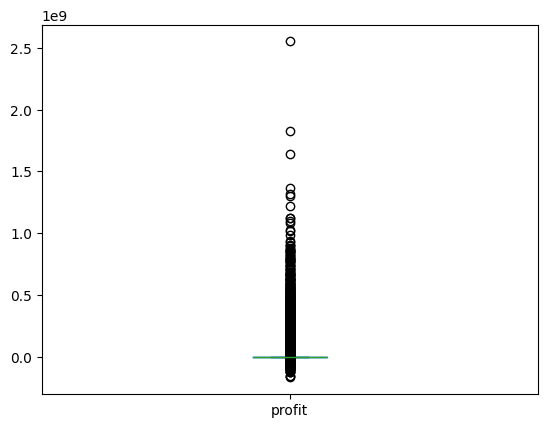

In [164]:
movies["profit"].plot(kind = "box")

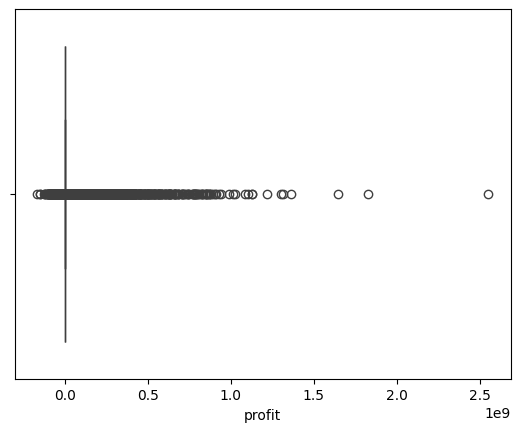

In [165]:
sns.boxplot(data = movies, x = "profit" )
plt.show()

In [166]:
movies["profit"].quantile(0.88)

43391.87999999827

#### Analysis: Only 12% of movies are able to generate a profit, while the rest only break even

### 5. Apakah ada hubungan antara profit dan rating?

In [167]:
profitable_movies = movies[movies["profit"] > 0]

In [168]:
profit_rating = profitable_movies.merge(rating_movies,
                        left_on = "id",
                        right_on = "movieId",
                        how = "inner")

In [169]:
profit_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  1032 non-null   bool          
 1   belongs_to_collection  326 non-null    object        
 2   budget                 1032 non-null   int64         
 3   genres                 1032 non-null   object        
 4   homepage               334 non-null    object        
 5   id                     1032 non-null   int64         
 6   imdb_id                1032 non-null   object        
 7   original_language      1032 non-null   object        
 8   original_title         1032 non-null   object        
 9   overview               1032 non-null   object        
 10  popularity             1032 non-null   float64       
 11  poster_path            1032 non-null   object        
 12  production_companies   1032 non-null   object        
 13  pro

Text(0.5, 1.0, 'Distribution of Movies by Rating and Profit')

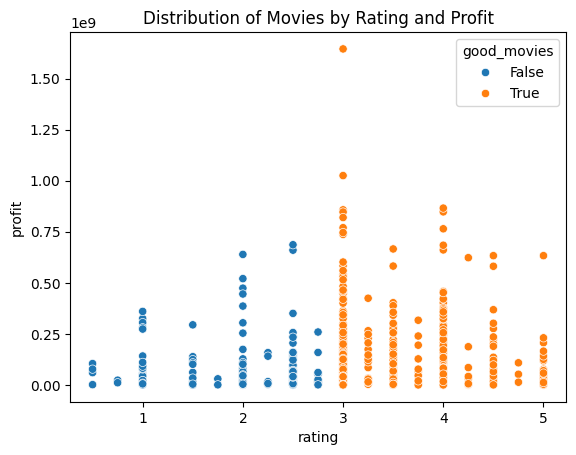

In [171]:
sns.scatterplot(data = profit_rating,
                x = "rating",
                y = "profit",
                hue = "good_movies")
plt.title('Distribution of Movies by Rating and Profit')

#### Analysis: Broadly speaking, there is no relationship.